## San Francisco Fires - 2018

dataset found:
https://data.sfgov.org/Public-Safety/Fire-Incidents/wr8u-xric

sf geojson:
https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point
%matplotlib inline

/Users/esther/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
fire= pd.read_csv("Fire_Incidents.csv")

/Users/esther/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11,12,19,44,54,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
fire.head()

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12044490,0,7th St. / Folsom St.,05/13/2012,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,05/13/2012 04:05:44 AM,SF,94103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,"(37.7767460000297, -122.407844)"
3,13033326,0,2799 Pacific Av,04/09/2013,130990286,04/09/2013 04:34:07 PM,04/09/2013 04:39:31 PM,04/09/2013 05:20:27 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11101416,0,Polk St. / Pine St.,11/01/2011,113050357,11/01/2011 06:07:45 PM,11/01/2011 06:10:17 PM,11/01/2011 06:11:09 PM,SF,94109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,"(37.7896190000297, -122.420497)"


In [5]:
fire.shape

(464460, 63)

In [6]:
fire['Incident Date'] = pd.to_datetime(fire['Incident Date'], format='%m/%d/%Y')

In [7]:
fire['year'] = fire['Incident Date'].apply(lambda x:x.strftime('%Y'))

In [8]:
fire['year'].value_counts().sort_index()

2003    32819
2004    29013
2005    27224
2006    27212
2007    30342
2008    29811
2009    30180
2010    31217
2011    31303
2012    31831
2013    30555
2014    26225
2015    31448
2016    31856
2017    31635
2018    11789
Name: year, dtype: int64

In [9]:
fire.columns

Index([u'Incident Number', u'Exposure Number', u'Address', u'Incident Date',
       u'Call Number', u'Alarm DtTm', u'Arrival DtTm', u'Close DtTm', u'City',
       u'Zipcode', u'Battalion', u'Station Area', u'Box', u'Suppression Units',
       u'Suppression Personnel', u'EMS Units', u'EMS Personnel',
       u'Other Units', u'Other Personnel', u'First Unit On Scene',
       u'Estimated Property Loss', u'Estimated Contents Loss',
       u'Fire Fatalities', u'Fire Injuries', u'Civilian Fatalities',
       u'Civilian Injuries', u'Number of Alarms', u'Primary Situation',
       u'Mutual Aid', u'Action Taken Primary', u'Action Taken Secondary',
       u'Action Taken Other', u'Detector Alerted Occupants', u'Property Use',
       u'Area of Fire Origin', u'Ignition Cause', u'Ignition Factor Primary',
       u'Ignition Factor Secondary', u'Heat Source', u'Item First Ignited',
       u'Human Factors Associated with Ignition', u'Structure Type',
       u'Structure Status', u'Floor of Fire Origin', 

In [10]:
fire.groupby('year')['Fire Injuries'].sum()

year
2003    11
2004    14
2005    12
2006     8
2007     7
2008    17
2009    24
2010     6
2011    13
2012     9
2013     9
2014    14
2015     2
2016     1
2017     0
2018     0
Name: Fire Injuries, dtype: int64

In [12]:
fire18= fire[fire['year']=='2018']

In [13]:
fire18.dropna(subset=['Location'], inplace=True)

/Users/esther/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
fire18['Location'].head()

450656     (37.78479700002968, -122.40949000000002)
450657    (37.785930000029666, -122.40550100000002)
450658    (37.764593000029656, -122.41954099999998)
450659            (37.751754000029635, -122.392561)
450660             (37.80013200002966, -122.419236)
Name: Location, dtype: object

In [30]:
fire18['lat'] = fire18['Location'].apply(lambda x: x.split(',')[0].replace("(", ""))
fire18['lat']=fire18['lat'].astype(float)

/Users/esther/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/esther/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [31]:
fire18['lon'] = fire18['Location'].apply(lambda x: x.split(',')[1].replace(")", ""))
fire18['lon']=fire18['lon'].astype(float)

/Users/esther/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/esther/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [61]:
fire18['geometry'] = fire18.apply(lambda x: Point(x['lon'], x['lat']), axis=1)

/Users/esther/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
geo_fire = geopandas.GeoDataFrame(fire18, geometry= 'geometry')

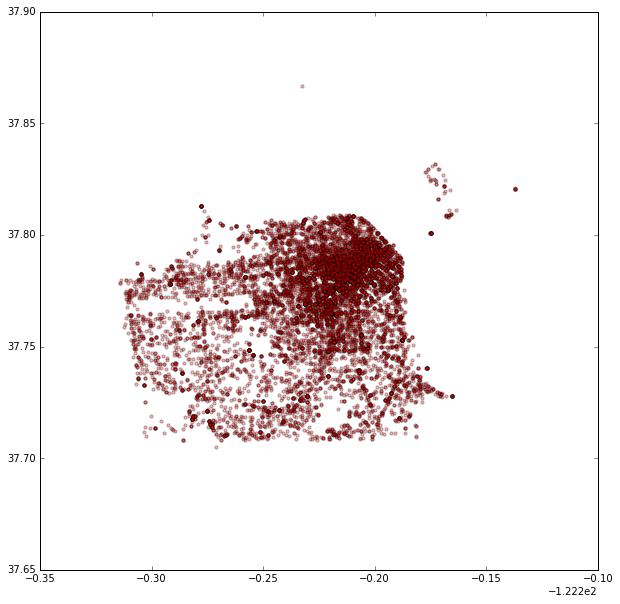

In [69]:
geo_fire.plot(figsize=(15,10), marker="o", color="red", edgecolor="black", markersize=10, alpha=0.3)
plt.show()

In [64]:
sf = geopandas.read_file("Analysis Neighborhoods.geojson")
sf.crs = {'init': 'epsg:4326'}
sf = sf.rename(columns={'geometry': 'geometry','nhood':'neighborhood_name'}).set_geometry('geometry')
sf.sample(5)

,neighborhood_name,geometry
40,Western Addition,(POLYGON ((-122.4214420004383 37.7855670000528...
8,Haight Ashbury,(POLYGON ((-122.4319979995735 37.7714309996540...
23,Oceanview/Merced/Ingleside,(POLYGON ((-122.4612809994581 37.7249970002057...
34,Sunset/Parkside,(POLYGON ((-122.4773079999152 37.7654480004039...
16,Marina,(POLYGON ((-122.4266236816762 37.8088925471013...


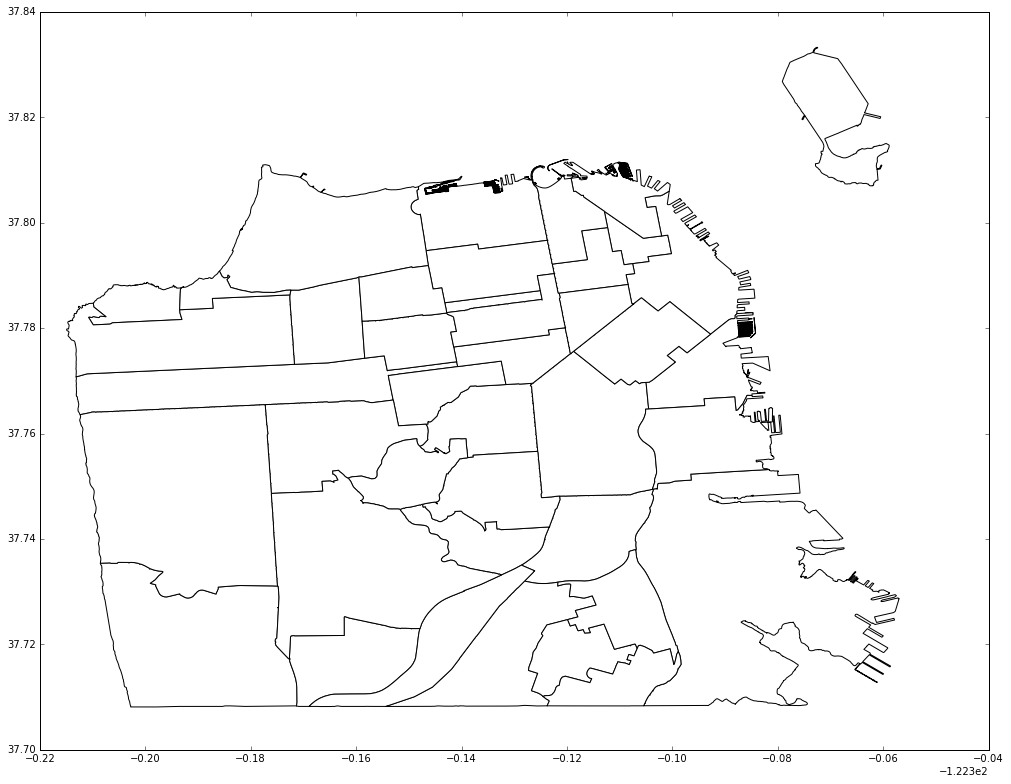

In [72]:
sf.plot(figsize=(17,14), color='white', edgecolor='black')
plt.show()

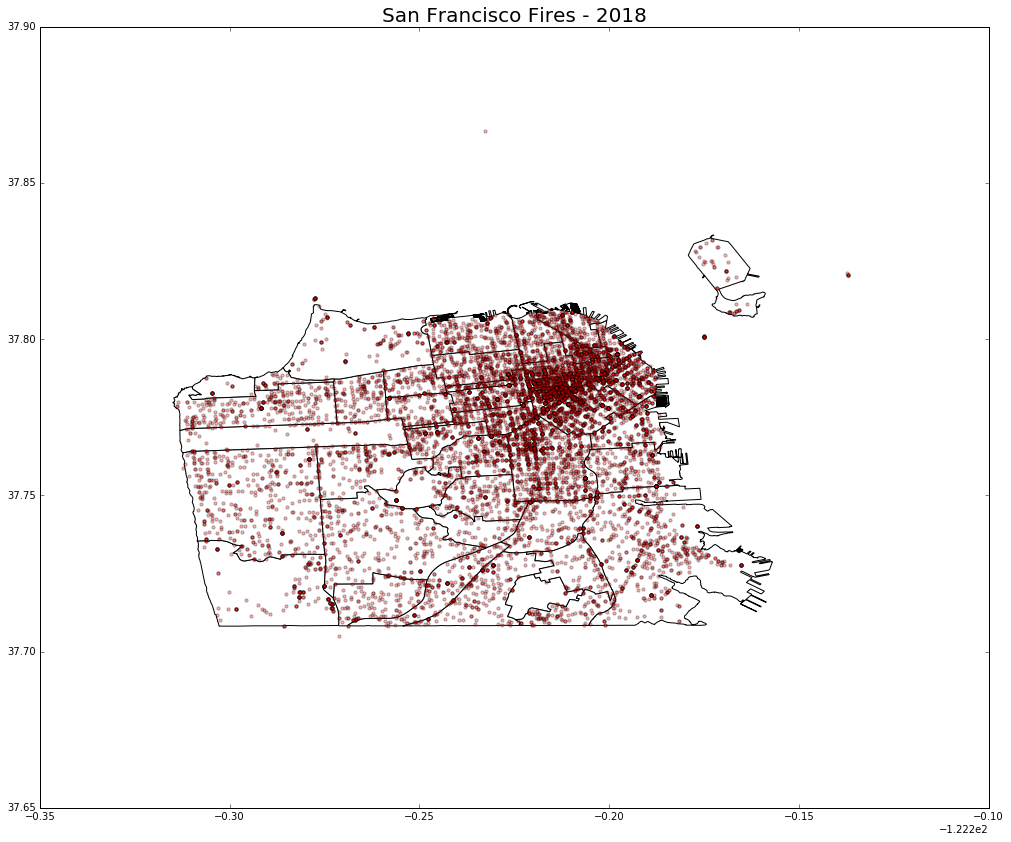

In [100]:
region_counts = pd.DataFrame(fire18['Neighborhood  District'].value_counts())
region_counts.columns= ['Total Fire Incidents']
region_counts

,Total Fire Incidents
Tenderloin,1255
Financial District/South Beach,1062
Mission,974
South of Market,867
Bayview Hunters Point,546
Nob Hill,465
Sunset/Parkside,450
Western Addition,447
Pacific Heights,364
Hayes Valley,340


In [104]:
chloropleth = pd.merge(sf, region_counts, how='right', right_index=True, left_on='neighborhood_name')

In [105]:
chloropleth.head()

,neighborhood_name,geometry,Total Fire Incidents
0,Bayview Hunters Point,(POLYGON ((-122.3815777424142 37.7530704309124...,546
1,Bernal Heights,(POLYGON ((-122.403612999828 37.74933700015653...,193
2,Castro/Upper Market,(POLYGON ((-122.4265550005568 37.7694849998470...,329
3,Chinatown,(POLYGON ((-122.4062259995664 37.7975590002937...,284
4,Excelsior,(POLYGON ((-122.4239820002333 37.7315519997551...,180


In [106]:
chloropleth = geopandas.GeoDataFrame(chloropleth, geometry='geometry')
chloropleth.crs = {'init': 'epsg:4326'}

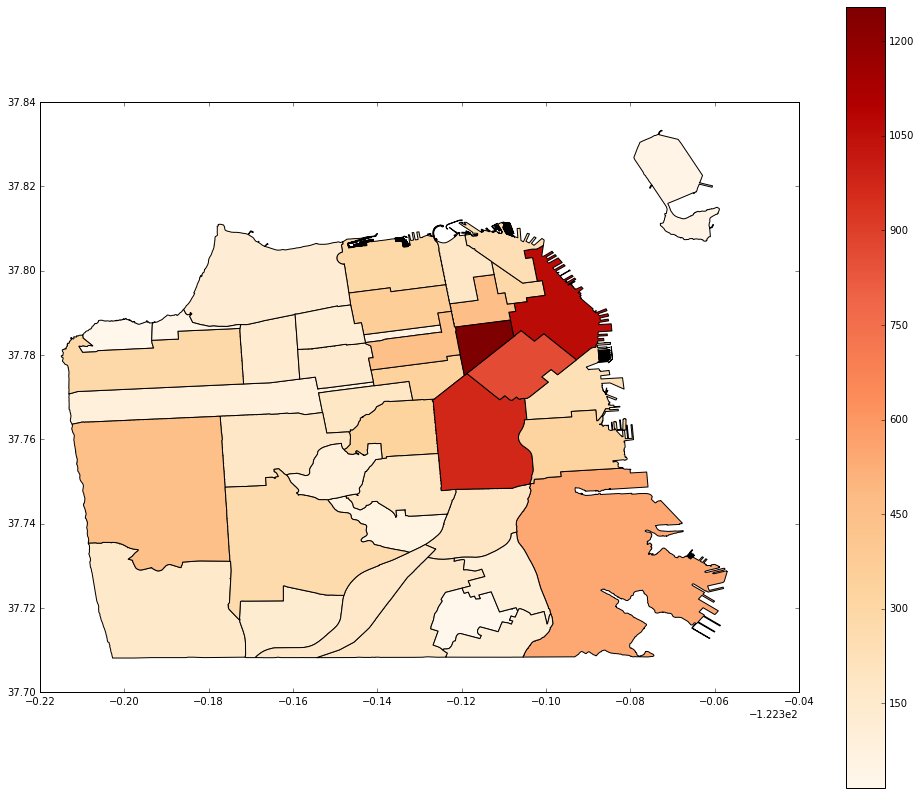

In [121]:
chloropleth.plot(column='Total Fire Incidents', cmap='OrRd', figsize=(17,14), legend=True)